In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load data
data = pd.read_csv("balancedtask1.csv")

In [ ]:
# Preprocess text
data["chat1"] = data["chat1"].str.lower()
data["chat1"] = data["chat1"].str.replace("[^\w\s]", "")
data["chat1"] = data["chat1"].str.replace("\d+", "")
data["chat1"] = data["chat1"].str.strip()
data["chat1"] = data["chat1"].str.split()
data["chat2"] = data["chat2"].str.lower()
data["chat2"] = data["chat2"].str.replace("[^\w\s]", "")
data["chat2"] = data["chat2"].str.replace("\d+", "")
data["chat2"] = data["chat2"].str.strip()
data["chat2"] = data["chat2"].str.split()

<ipython-input-4-9c96dabc18ce>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat1"] = data["chat1"].str.replace("[^\w\s]", "")
<ipython-input-4-9c96dabc18ce>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat1"] = data["chat1"].str.replace("\d+", "")
<ipython-input-4-9c96dabc18ce>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat2"] = data["chat2"].str.replace("[^\w\s]", "")
<ipython-input-4-9c96dabc18ce>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data["chat2"] = data["chat2"].str.replace("\d+", "")


In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data["chat1"] = data["chat1"].apply(lambda x: [word for word in x if word not in stop_words])
data["chat2"] = data["chat2"].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["chat1"])
sequences1 = tokenizer.texts_to_sequences(data["chat1"])
tokenizer.fit_on_texts(data["chat2"])
sequences2 = tokenizer.texts_to_sequences(data["chat2"])

In [ ]:
# Pad sequences
maxlen = 100
padded_sequences1 = pad_sequences(sequences1, maxlen=maxlen)
padded_sequences2 = pad_sequences(sequences2, maxlen=maxlen)

In [ ]:
padd = np.concatenate([padded_sequences1, padded_sequences2], axis = 1)

In [ ]:
# Encode labels
labels = pd.get_dummies(data["label"]).values

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [ ]:
# Define model
model = Sequential()
model.add(Embedding(2 * (len(tokenizer.word_index) + 1), 128, input_length=2 * maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [ ]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
28/28 [==============================] - 18s 370ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6934 - val_accuracy: 0.4886
Epoch 2/10
28/28 [==============================] - 8s 303ms/step - loss: 0.5346 - accuracy: 0.7460 - val_loss: 0.6884 - val_accuracy: 0.5818
Epoch 3/10
28/28 [==============================] - 9s 305ms/step - loss: 0.1097 - accuracy: 0.9665 - val_loss: 1.0017 - val_accuracy: 0.5886
Epoch 4/10
28/28 [==============================] - 9s 307ms/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 1.1681 - val_accuracy: 0.5750
Epoch 5/10
28/28 [==============================] - 8s 302ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 1.3037 - val_accuracy: 0.5750
Epoch 6/10
28/28 [==============================] - 9s 305ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 1.5062 - val_accuracy: 0.5841
Epoch 7/10
28/28 [==============================] - 9s 308ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.5682 - val_accuracy: 0.5841
Epoch

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

14/14 [==============================] - 3s 48ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63       213
           1       0.65      0.44      0.52       227

    accuracy                           0.59       440
   macro avg       0.60      0.59      0.58       440
weighted avg       0.60      0.59      0.58       440

[[158  55]
 [127 100]]


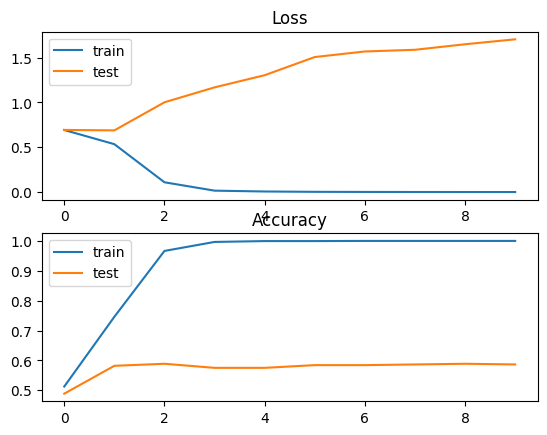

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()